In [1]:
# Load and analyse a log file from the `getting` HTTP load generator.
LOG_FILE_PATH = "../logs/got.txt"

/var/folders/82/6xch38_95_d545t14cp867pc0000gr/T/ipykernel_76564/2928244062.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


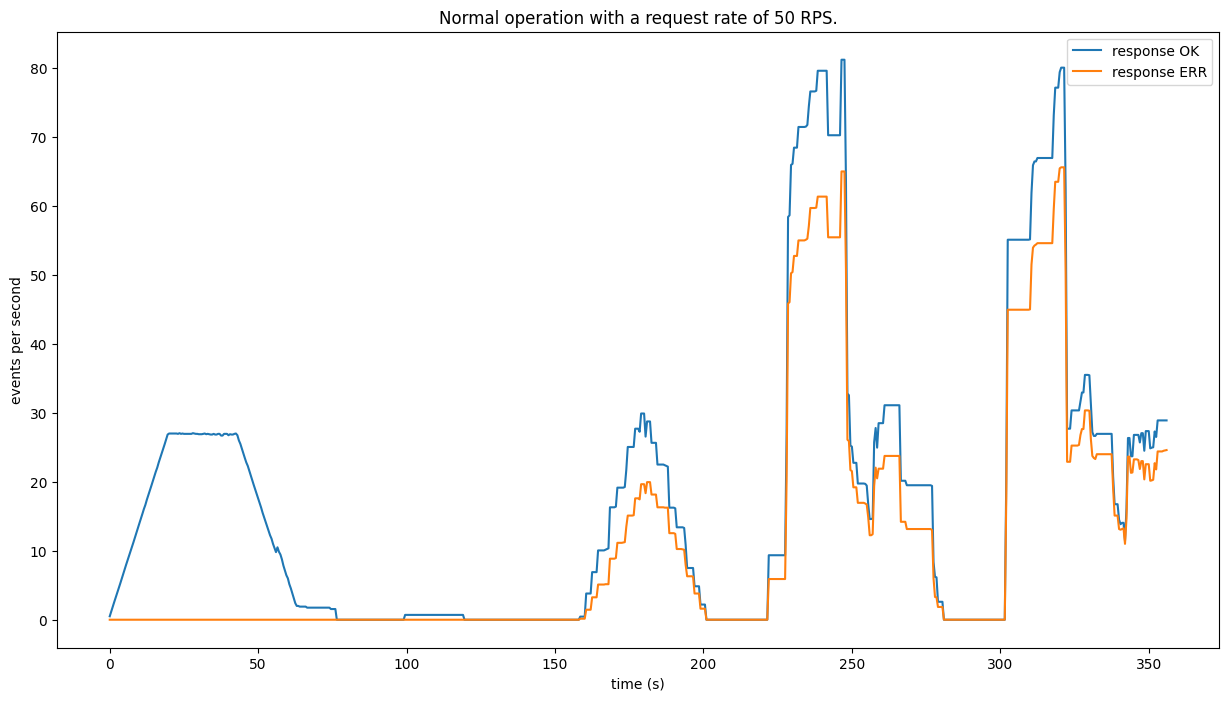

In [4]:
from got import Got,Response
import plot_utils
from plot_utils import Roller,LogFile
import rolling_funcs as fn

got = Got(LOG_FILE_PATH)

window_len_secs = 20.0
rollers = [
    Roller("response OK", fn.count_ok, rate=True),
    Roller("response ERR", fn.count_err, rate=True)
]

fig,ax = plot_utils.fig("Normal operation with a request rate of 50 RPS.",'time (s)','events per second')
plot_utils.rolling(ax,got, rollers, window_secs=window_len_secs, const_stride_secs=0.5, zeroed_times=True)
ax.legend()
fig.show()

/var/folders/82/6xch38_95_d545t14cp867pc0000gr/T/ipykernel_76564/2907860217.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


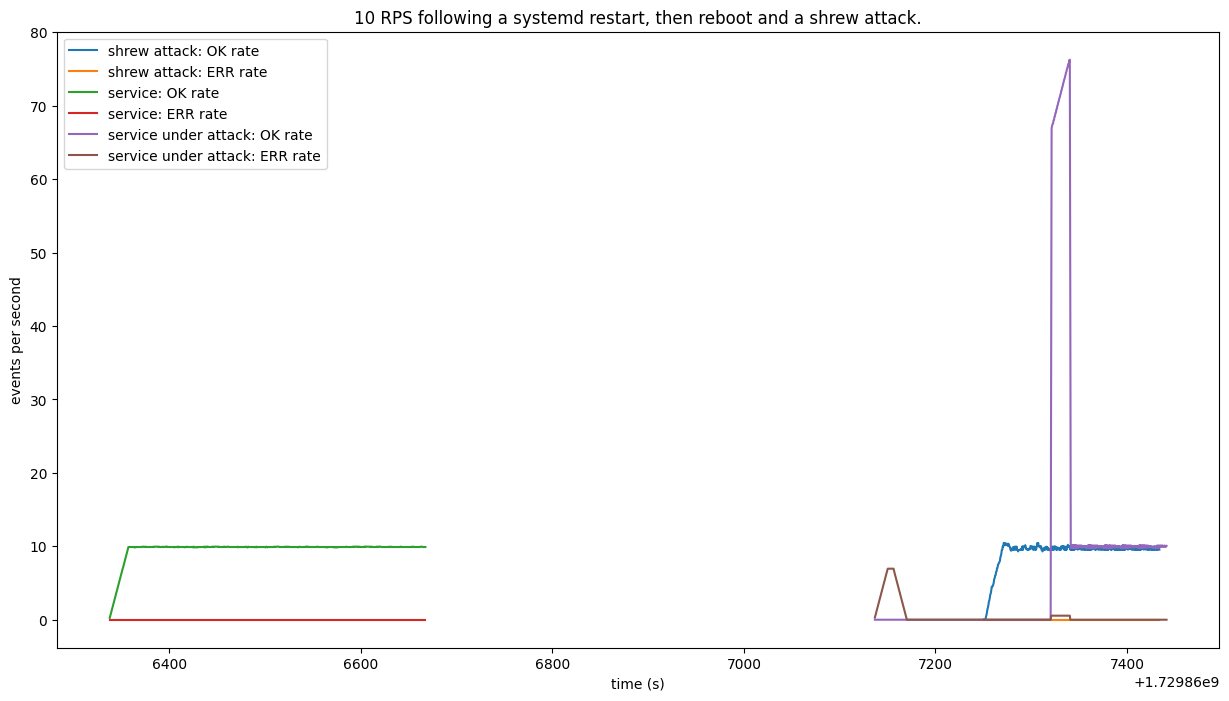

In [6]:

window_len_secs = 20.0
log_files = {
    "shrew attack": LogFile(path= "../logs/mac/2024-10-25_14-40-50.238948.txt"),
    "service" : LogFile(path="../logs/kleene/2024-10-25_14-25-37.472506.txt"),
    "service under attack" : LogFile(path="../logs/kleene/2024-10-25_14-38-56.215879.txt"),
}
rollers = [
    Roller("OK rate", fn.count_ok, rate=True),
    Roller("ERR rate", fn.count_err, rate=True)
]

fig,ax = plot_utils.fig('10 RPS following a systemd restart, then reboot and a shrew attack.', 'time (s)', 'events per second')
plot_utils.overlay(ax,log_files,rollers,window_secs=window_len_secs, const_stride_secs=0.5, zeroed_times=False)
ax.legend()
fig.show()


/var/folders/82/6xch38_95_d545t14cp867pc0000gr/T/ipykernel_76564/3149006662.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


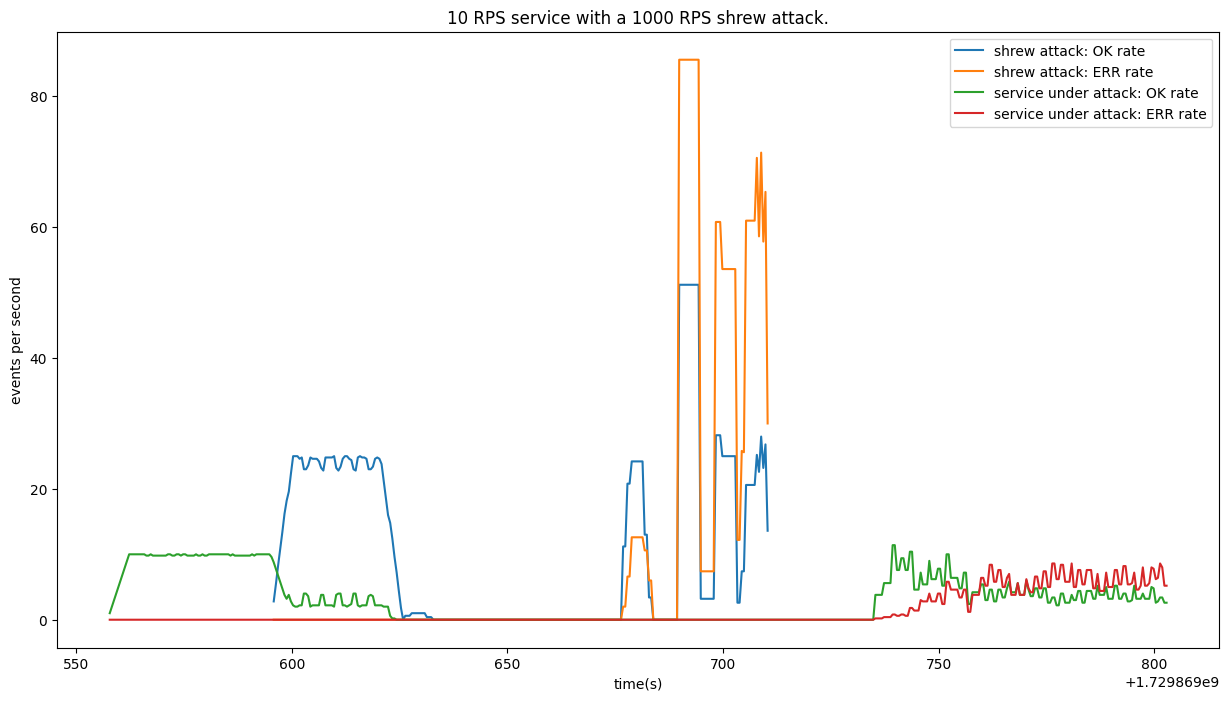

In [8]:

window_len_secs = 5.0
log_files = {
    "shrew attack": LogFile(path="../logs/mac/2024-10-25_15-19-55.321281.txt"),
    "service under attack" : LogFile(path="../logs/kleene/2024-10-25_15-19-17.306844.txt"),
}
rollers = [
    Roller("OK rate", fn.count_ok, rate=True),
    Roller("ERR rate", fn.count_err, rate=True)
]

fig,ax = plot_utils.fig('10 RPS service with a 1000 RPS shrew attack.', 'time(s)', 'events per second')
plot_utils.overlay(ax,log_files,rollers,window_secs=window_len_secs, const_stride_secs=0.5, zeroed_times=False)
ax.legend()
fig.show()
